##### КТ-2, группа ПМ-1801

##### Смирнова Анастасия Эдуардовна

### ТЕМА. Сжатие изображений.

In [1]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.datasets import load_sample_images
import pandas as pd
import time
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [2]:
#  Загрузижаю лица olivetti
x, y = fetch_olivetti_faces(return_X_y=True)

In [3]:
#размерности  400 x 4096   (40 лиц x 10 вариантов) х (64х64)
x.shape, y.shape

((400, 4096), (400,))

In [4]:
# Формирую случайным образом выборки train и test 

In [5]:
np.random.seed(17)
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=1/7.0,random_state=0)

### Применяю метод РСА

In [6]:
list_of_params=[0.7,0.8,None]  #3 варианта отбора количества компонент, один из них - полный набор

In [7]:
def pca_with_param(p):
    
    start = time.time()

    pca = PCA(p)
    pca.fit(train_x)

    train_x_pca = pca.transform(train_x)
    test_x_pca = pca.transform(test_x)

    logisticRegr = LogisticRegression(solver = 'lbfgs')
    logisticRegr.fit(train_x_pca, train_y)
    
    finish = time.time() - start #вычисление временных затрат
    return [pca.n_components_,finish,logisticRegr.score(test_x_pca, test_y),fr' {int(logisticRegr.score(test_x_pca, test_y)*len(test_y))}/{len(test_y)}'],pca.inverse_transform(train_x_pca)

In [8]:
table_pca=[]
list_for_im=[]
for i in list_of_params:
    table_pca.append(pca_with_param(i)[0])
    list_for_im.append(pca_with_param(i)[1])

C:\Users\nasti\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\nasti\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [9]:
df_pca = pd.DataFrame(table_pca,columns=['number of components','learning time', 'accuracy score','количество правильно распознанных изображений'])
df_pca

,number of components,learning time,accuracy score,количество правильно распознанных изображений
0,13,0.259796,0.879310,51/58
1,26,0.302000,0.965517,56/58
2,342,0.597561,0.965517,56/58


С увеличением числа компонент увеличивается и время необходимое для работы, однако вместе с этим растет и точность предсказанных данных.

При изменении числа компонент увеличилось число правильно распознанных изображений для тестовой выборки с 51 из 58 до 56 из 58 штук.

### Отбор изображений

In [10]:
import random
np.random.seed(15)
im1=np.random.choice(len(train_x))
im2=np.random.choice(len(train_x))

Построю последовательность изображений. Первое - исходное, далее изображения после сжатия от наименьшего к наибольшему числу примененных компонент.

In [11]:
import matplotlib.pyplot as plt
def plot_res(im_num):
    fig, ax = plt.subplots(1,4,figsize=(10, 20))
    for i in range(3):
        ax[i].imshow(list_for_im[i][im_num].reshape(64, 64), cmap='gray')
    ax[3].imshow(train_x[im_num].reshape(64, 64), cmap='gray')
    ax[3].set_title('Изображение до сжатия')
    plt.show()

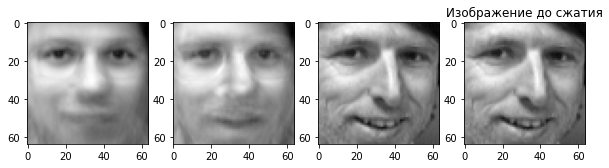

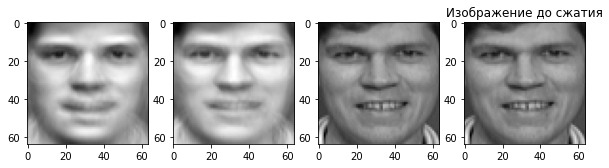

(None, None)

In [12]:
plot_res(im1),plot_res(im2)

### Вывод

Изображение потеряло качество после сжатия. Видно что сохранились границы смены цветов, однако цветовая палитра нарушилась. 

Кроме этого видно, что при увеличении числа компонент качество изображения возрастает, при этом размер изображения тоже увеличивается.